In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

In [2]:
import os
data_path = os.getcwd()[:-9] + "src/d01_data/"

In [3]:
# Load the raw SQL data -- not done in script version!
# (in the script, we will simply obtain these tables from SQL and transform them
# in-situ into the table to be used in the front end, not saving any intermediary files.)
raw_weather = pd.read_pickle(data_path+"/raw_weather.pkl")
raw_poptimes = pd.read_pickle(data_path+"/raw_poptimes.pkl")

In [4]:
len(raw_weather)

2239

In [5]:
raw_weather.tail()

,id,park_name,reception_time,reference_time,sunrise_time,sunset_time,clouds,rain_1h,snow_1h,wind_speed,wind_deg,humidity,press,temp,temp_feels,temp_max,temp_min,status,detailed_status
2234,2235,Prospect Park,1589367304,1589367004,1589348427,1589400248,1,0.0,0.0,3.1,0.0,29,1027,51.55,42.67,55.0,48.00,Clear,clear sky
2235,2236,Prospect Park,1589367606,1589367605,1589348427,1589400248,1,0.0,0.0,3.1,0.0,29,1027,51.80,42.94,55.0,48.20,Clear,clear sky
2236,2237,Prospect Park,1589367905,1589367605,1589348427,1589400248,1,0.0,0.0,3.1,0.0,29,1027,51.80,42.94,55.0,48.20,Clear,clear sky
2237,2238,Prospect Park,1589368206,1589367605,1589348427,1589400248,1,0.0,0.0,3.1,0.0,29,1027,51.80,42.94,55.0,48.20,Clear,clear sky
2238,2239,Prospect Park,1589368505,1589368505,1589348427,1589400248,1,0.0,0.0,3.1,0.0,26,1027,52.77,43.77,55.4,51.01,Clear,clear sky


In [6]:
len(raw_poptimes)

1865

In [7]:
raw_poptimes.tail()

,id,place_name,local_time,current_pop,data_json
1860,1861,Prospect Park,1589367303,30,"{'id': 'ChIJQwRohxBbwokRmHrfAMb3ixc', 'name': ..."
1861,1862,Prospect Park,1589367604,30,"{'id': 'ChIJQwRohxBbwokRmHrfAMb3ixc', 'name': ..."
1862,1863,Prospect Park,1589367904,28,"{'id': 'ChIJQwRohxBbwokRmHrfAMb3ixc', 'name': ..."
1863,1864,Prospect Park,1589368205,27,"{'id': 'ChIJQwRohxBbwokRmHrfAMb3ixc', 'name': ..."
1864,1865,Prospect Park,1589368504,26,"{'id': 'ChIJQwRohxBbwokRmHrfAMb3ixc', 'name': ..."


In [8]:
# Define some useful utilities: 

def binMinute(minute):
    '''
    Calculate which of the 15min bins the current minute falls in.
    The bins are 05, 20, 35, 50.
    Current minutes less than 05 belong to bin 50 of the hour before.
    '''
    m2q = (minute - 5) / 15
    if m2q < 0:
        newminute = -10
    elif m2q < 1:
        newminute = 5
    elif m2q < 2:
        newminute = 20
    elif m2q < 3:
        newminute = 35
    elif m2q < 4:
        newminute = 50
    return newminute


def convert_time_and_bin(dframe, time_col):
    
    import datetime as dt
    # Convert time to datetime and bin the time into a time_bin 
    dframe['datetime'] = dframe[time_col].apply(lambda x: dt.datetime.fromtimestamp(x))
 
    # bin the time
    dframe['time_bin'] = dframe['datetime'].apply(lambda x: x.replace(minute = 0, second = 0) + dt.timedelta(minutes=binMinute(x.minute)))
    
    return dframe

In [9]:
# Convert time to datetime & create time_bin column

raw_weather = convert_time_and_bin(raw_weather, 'reference_time')
raw_poptimes = convert_time_and_bin(raw_poptimes, 'local_time')

In [10]:
raw_weather.head()

,id,park_name,reception_time,reference_time,sunrise_time,sunset_time,clouds,rain_1h,snow_1h,wind_speed,...,humidity,press,temp,temp_feels,temp_max,temp_min,status,detailed_status,datetime,time_bin
0,1,Prospect Park,1588694190,1588694190,1588657742,1588708558,1,0.0,0.0,2.1,...,21,1012,60.82,53.24,64.0,59.0,Clear,clear sky,2020-05-05 11:56:30,2020-05-05 11:50:00
1,2,Prospect Park,1588694408,1588694406,1588657742,1588708558,1,0.0,0.0,2.1,...,21,1012,60.75,53.15,63.0,59.0,Clear,clear sky,2020-05-05 12:00:06,2020-05-05 11:50:00
2,3,Prospect Park,1588694704,1588694704,1588657742,1588708558,1,0.0,0.0,2.1,...,21,1012,60.96,53.38,63.0,59.0,Clear,clear sky,2020-05-05 12:05:04,2020-05-05 12:05:00
3,4,Prospect Park,1588695004,1588695004,1588657742,1588708558,1,0.0,0.0,2.1,...,21,1012,60.96,53.38,63.0,59.0,Clear,clear sky,2020-05-05 12:10:04,2020-05-05 12:05:00
4,5,Prospect Park,1588695304,1588695004,1588657742,1588708558,1,0.0,0.0,2.1,...,21,1012,60.96,53.38,63.0,59.0,Clear,clear sky,2020-05-05 12:10:04,2020-05-05 12:05:00


In [11]:
raw_poptimes.head()

,id,place_name,local_time,current_pop,data_json,datetime,time_bin
0,1,Prospect Park,1588694189,51,"{'id': 'ChIJQwRohxBbwokRmHrfAMb3ixc', 'name': ...",2020-05-05 11:56:29,2020-05-05 11:50:00
1,2,Prospect Park,1588694404,50,"{'id': 'ChIJQwRohxBbwokRmHrfAMb3ixc', 'name': ...",2020-05-05 12:00:04,2020-05-05 11:50:00
2,3,Prospect Park,1588694703,48,"{'id': 'ChIJQwRohxBbwokRmHrfAMb3ixc', 'name': ...",2020-05-05 12:05:03,2020-05-05 12:05:00
3,4,Prospect Park,1588695003,46,"{'id': 'ChIJQwRohxBbwokRmHrfAMb3ixc', 'name': ...",2020-05-05 12:10:03,2020-05-05 12:05:00
4,5,Prospect Park,1588695303,44,"{'id': 'ChIJQwRohxBbwokRmHrfAMb3ixc', 'name': ...",2020-05-05 12:15:03,2020-05-05 12:05:00


In [12]:
# Join our raw dataframes on time_bin
df = raw_weather.join(raw_poptimes[['current_pop','time_bin']].set_index('time_bin'),on = 'time_bin')

In [13]:
df.head()

,id,park_name,reception_time,reference_time,sunrise_time,sunset_time,clouds,rain_1h,snow_1h,wind_speed,...,press,temp,temp_feels,temp_max,temp_min,status,detailed_status,datetime,time_bin,current_pop
0,1,Prospect Park,1588694190,1588694190,1588657742,1588708558,1,0.0,0.0,2.1,...,1012,60.82,53.24,64.0,59.0,Clear,clear sky,2020-05-05 11:56:30,2020-05-05 11:50:00,51.0
0,1,Prospect Park,1588694190,1588694190,1588657742,1588708558,1,0.0,0.0,2.1,...,1012,60.82,53.24,64.0,59.0,Clear,clear sky,2020-05-05 11:56:30,2020-05-05 11:50:00,50.0
1,2,Prospect Park,1588694408,1588694406,1588657742,1588708558,1,0.0,0.0,2.1,...,1012,60.75,53.15,63.0,59.0,Clear,clear sky,2020-05-05 12:00:06,2020-05-05 11:50:00,51.0
1,2,Prospect Park,1588694408,1588694406,1588657742,1588708558,1,0.0,0.0,2.1,...,1012,60.75,53.15,63.0,59.0,Clear,clear sky,2020-05-05 12:00:06,2020-05-05 11:50:00,50.0
2,3,Prospect Park,1588694704,1588694704,1588657742,1588708558,1,0.0,0.0,2.1,...,1012,60.96,53.38,63.0,59.0,Clear,clear sky,2020-05-05 12:05:04,2020-05-05 12:05:00,48.0


In [14]:
# create good, maybe, bad weather columns
good = ['clear sky','few clouds']
maybe = ['scattered clouds','mist','light rain','broken clouds']
bad = ['heavy intensity rain','moderate rain','overcast clouds','thunderstorm with rain','thunderstorm with light rain']
df['status_good'] = np.zeros(len(df))
df['status_maybe'] = np.zeros(len(df))
df['status_bad'] = np.zeros(len(df))
df.loc[df.detailed_status.isin(good),'status_good'] =1
df.loc[df.detailed_status.isin(maybe),'status_maybe'] =1
df.loc[df.detailed_status.isin(bad),'status_bad'] =1

# add time features
df['dayofweek'] = df.time_bin.dt.dayofweek
df['hour'] = df.time_bin.dt.hour
    
# select final features. Note: the order is important.
df = df[['time_bin','current_pop', 'wind_speed', 'temp', 'status_good', 
         'status_maybe', 'status_bad', 'dayofweek', 'hour']]

In [15]:
df.tail()

,time_bin,current_pop,wind_speed,temp,status_good,status_maybe,status_bad,dayofweek,hour
2237,2020-05-13 06:50:00,30.0,3.1,51.80,1.0,0.0,0.0,2,6
2237,2020-05-13 06:50:00,30.0,3.1,51.80,1.0,0.0,0.0,2,6
2238,2020-05-13 07:05:00,28.0,3.1,52.77,1.0,0.0,0.0,2,7
2238,2020-05-13 07:05:00,27.0,3.1,52.77,1.0,0.0,0.0,2,7
2238,2020-05-13 07:05:00,26.0,3.1,52.77,1.0,0.0,0.0,2,7


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5934 entries, 0 to 2238
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time_bin      5934 non-null   datetime64[ns]
 1   current_pop   5576 non-null   float64       
 2   wind_speed    5934 non-null   float64       
 3   temp          5934 non-null   float64       
 4   status_good   5934 non-null   float64       
 5   status_maybe  5934 non-null   float64       
 6   status_bad    5934 non-null   float64       
 7   dayofweek     5934 non-null   int64         
 8   hour          5934 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 463.6 KB


In [17]:
# Drop NAs
df = df.dropna(axis=0)

In [18]:
df = df.groupby('time_bin').agg({'current_pop':'mean', 'wind_speed':'mean', 'temp':'mean',
                                 'status_good':'max', 'status_maybe':'min', 'status_bad':'min',
                                 'dayofweek':'mean', 'hour':'mean'})

In [19]:
df = df.reset_index()

In [20]:
df.head()

,time_bin,current_pop,wind_speed,temp,status_good,status_maybe,status_bad,dayofweek,hour
0,2020-05-05 11:50:00,50.500000,2.1,60.785,1.0,0.0,0.0,1,11
1,2020-05-05 12:05:00,46.000000,2.1,60.960,1.0,0.0,0.0,1,12
2,2020-05-05 12:20:00,45.000000,2.6,61.645,1.0,0.0,0.0,1,12
3,2020-05-05 12:35:00,48.333333,2.6,61.660,1.0,0.0,0.0,1,12
4,2020-05-05 12:50:00,55.333333,2.6,61.840,1.0,0.0,0.0,1,12


In [21]:
# For script version:
# df.to_pickle("../d01_data/03_SQL_data_for_frontend_ee.pkl")

## Develop heatmap of past 7 days:

In [22]:
# Obtain data for just the past 7 days
import datetime as dt
from pickle import load
from pytz import timezone

# Localize df's time_bin column
df = df.set_index('time_bin')
df = df.tz_localize('US/Eastern')
df = df.reset_index()

# Filter df so that it's just the past 7 days, between 7am and 8pm
oneweekago = (dt.datetime.now(tz=timezone('US/Eastern')) - dt.timedelta(days=7))
df = df[(df.time_bin >= oneweekago) & (df.hour >= 7) & (df.hour <= 19)]

# Reset the index
df = df.reset_index(drop = True)

In [23]:
df.head()

,time_bin,current_pop,wind_speed,temp,status_good,status_maybe,status_bad,dayofweek,hour
0,2020-05-06 16:50:00-04:00,11.000000,2.1,45.5700,0.0,1.0,0.0,2,16
1,2020-05-06 17:05:00-04:00,10.666667,1.8,45.5700,0.0,1.0,0.0,2,17
2,2020-05-06 17:20:00-04:00,9.000000,1.5,45.6225,0.0,0.0,1.0,2,17
3,2020-05-06 17:35:00-04:00,8.333333,1.5,45.7350,0.0,0.0,1.0,2,17
4,2020-05-06 17:50:00-04:00,8.000000,1.5,46.0160,0.0,0.0,1.0,2,17


In [24]:
# Import model & add predictions 

# Import our model
rf = load(open(os.getcwd()[:-9] + "src/d03_modeling/rfc_HW_23.pkl",'rb'))

# Define input to model
X = df.drop('time_bin',axis=1)

# Add predictions & predicted probability of UNSAFE to df
df['prediction'] = rf.predict(X)
probs = pd.DataFrame(rf.predict_proba(X), columns=rf.classes_)
probs.columns = ['prob_safe','prob_unsafe']
df['prob_unsafe'] = probs.prob_unsafe

In [25]:
# Create a specialized dataframe for our heatmap

# Create day column
df['day'] = df.time_bin.apply(lambda x: x.day)

# Create timebins that are same across different days
df['daily_bin'] = df.time_bin.apply(lambda x: str(x.hour).zfill(2) + ":" + str(x.minute).zfill(2))

# Order the timebins in order
bins = []
for i in range(0,21):
    for j in range(5, 60, 15):
        bins.append(str(i).zfill(2)+":"+str(j).zfill(2))

daily_bin = pd.Categorical(df.daily_bin, categories=bins, ordered=True)

# Add ordered categorical variable for timebin that applies across
# different days
df['daily_bin'] = daily_bin

# Create a set of readable labels for each day
xlabels = pd.unique(df.time_bin.apply(lambda x: x.strftime("%Y-%m-%d")))

# Create specialized dataframe that we will use to generate our heatmap
for_map = df.pivot_table(index='day', columns='daily_bin', values='prob_unsafe')

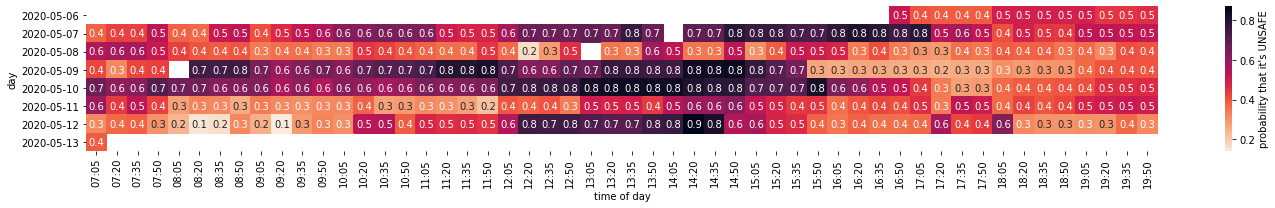

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Generate heatmap
# Set dimensions for our heatmap
fig_dims = (20, 3)
fig, ax = plt.subplots(figsize=fig_dims)

# Initialize heatmap
htmap = sns.heatmap(for_map, annot=True, fmt=".1f",
                    ax=ax, cbar_kws={'label': 'probability that it\'s UNSAFE'},
                   cmap = sns.cm.rocket_r)
htmap.set(yticklabels=xlabels)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.xlabel("time of day")
plt.tight_layout()


plt.savefig(os.getcwd()[:-9]+ "src/d06_visuals/heatmap.png")
plt.show()

In [ ]:
## Create vertical heatmap: 

# Create specialized dataframe that we will use to generate our heatmap
for_map = df.pivot_table(index='daily_bin', columns='day', values='prob_unsafe')

# Generate heatmap
    # Set dimensions for our heatmap
    fig_dims = (5, 12)
    fig, ax = plt.subplots(figsize=fig_dims)
    
    # Initialize heatmap
    htmap = sns.heatmap(for_map, annot=True, fmt=".1f",
                        ax=ax, cbar_kws={'label': 'probability that it\'s UNSAFE'},
                       cmap = sns.cm.rocket_r)
    htmap.set(xticklabels=xlabels)
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    plt.savefig("../d06_visuals/heatmap_vertical.png")
    st.pyplot()